# Sentiment Analysis
## Background Reading:

*Intro to Statistical Learning*: 10.4 Document Classification, 10.5 Recurrent Neural Network (Page 419-431)

*Ethical Algorithm*: Chapter 5, Risky Business (Page 178-188)

## Essence of Data

In [1]:
#install transformers
!pip install  transformers 

#install umap
!pip install umap-learn


In [4]:
# if git is not installed: conda install git
!git clone https://github.com/zlisto/sentiment_analysis

import os
os.chdir("sentiment_analysis")

Cloning into 'sentiment_analysis'...


In [9]:
#!pip3 install torch torchvision torchaudio

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import codecs
import umap
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"device ={device}")

device =cpu


In [3]:
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")


Downloading:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [4]:
def sentiment_classifier(text,model,tokenizer):
    inputs = tokenizer.encode_plus(text, return_tensors='pt', add_special_tokens=True)

    token_type_ids = inputs['token_type_ids']
    input_ids = inputs['input_ids']

    output = model(input_ids, token_type_ids=token_type_ids,return_dict=True,output_hidden_states=True)
    logits = np.array(output.logits.tolist()[0])
    prob = np.exp(logits)/np.sum(np.exp(logits))
    sentiment = np.sum([(x+1)*prob[x] for x in range(len(prob))])  #use this line if you want the mean score
    embedding = output.hidden_states[12].detach().numpy().squeeze()[0]
    
    return sentiment, embedding


In [5]:
Text = ["This class is kinda boring, but informative", 
        "This class is awesome", 
        "this class is ok", 
        "this class is stupid",
        "this class is fun",
       "this class is fun!",
       "this class is :(",
       "this class is :)",
]

In [6]:
for text in Text:
    sentiment,embedding = sentiment_classifier(text,model,tokenizer)
    print(f"Text: {text}\nSentiment:{sentiment:.2f}\n")

Text: This class is kinda boring, but informative
Sentiment:3.12

Text: This class is awesome
Sentiment:4.84

Text: this class is ok
Sentiment:3.27

Text: this class is stupid
Sentiment:1.24

Text: this class is fun
Sentiment:4.26

Text: this class is fun!
Sentiment:4.44

Text: this class is :(
Sentiment:3.57

Text: this class is :)
Sentiment:4.29



In [7]:
df = pd.read_csv("data/tweets_sentiment_embedding.csv")

df = df[['screen_name','text','retweet_count']]
ntweets = len(df)
print(f"dataframe has {ntweets} tweets\n")
[print(f"Tweets from {x}") for x in df.screen_name.unique()];


dataframe has 29056 tweets

Tweets from elonmusk
Tweets from MichelleObama
Tweets from BarackObama
Tweets from AOC
Tweets from KingJames
Tweets from KimKardashian
Tweets from mtgreenee
Tweets from nytimes
Tweets from kanyewest
Tweets from JoeBiden


In [8]:
%%time
c = 0
Sentiment = []
Embedding = []
for index,row in df.iterrows():
    c+=1
    if c%1000==0:print(f"Tweet {c}/{len(df)}")
    sentiment,embedding = sentiment_classifier(row.text,model,tokenizer)
    Sentiment.append(sentiment)
    Embedding.append(embedding)

df['sentiment'] = Sentiment
df.to_csv("data/tweets_sentiment.csv")
df.head()
    

Tweet 1000/29056
Tweet 2000/29056
Tweet 3000/29056
Tweet 4000/29056
Tweet 5000/29056
Tweet 6000/29056
Tweet 7000/29056
Tweet 8000/29056
Tweet 9000/29056
Tweet 10000/29056
Tweet 11000/29056
Tweet 12000/29056
Tweet 13000/29056
Tweet 14000/29056
Tweet 15000/29056
Tweet 16000/29056
Tweet 17000/29056
Tweet 18000/29056
Tweet 19000/29056
Tweet 20000/29056
Tweet 21000/29056
Tweet 22000/29056
Tweet 23000/29056
Tweet 24000/29056
Tweet 25000/29056
Tweet 26000/29056
Tweet 27000/29056
Tweet 28000/29056
Tweet 29000/29056
Wall time: 52min 4s


,screen_name,text,retweet_count,sentiment
0,elonmusk,@Teslarati SpaceX in south Texas &amp; Tesla i...,1404,3.535394
1,elonmusk,@someone3201 @ERCOT_ISO Yes,208,2.841278
2,elonmusk,.@ERCOT_ISO is not earning that R,8091,1.694170
3,elonmusk,@MattWallace888 @vladtenev @RobinhoodApp You\u...,1559,2.935604
4,elonmusk,"@Tesla Covered in snow &amp; ice, roads mostly...",1430,1.583284


In [9]:
df = pd.read_csv("data/tweets_sentiment_embedding.csv")

print(f"dataframe has {len(df)} tweets")
[print(f"Tweets from {x}") for x in df.screen_name.unique()];
df.sample(n=5)

dataframe has 29056 tweets
Tweets from elonmusk
Tweets from MichelleObama
Tweets from BarackObama
Tweets from AOC
Tweets from KingJames
Tweets from KimKardashian
Tweets from mtgreenee
Tweets from nytimes
Tweets from kanyewest
Tweets from JoeBiden


,Unnamed: 0,screen_name,text,retweet_count,sentiment,umap_transformer_x,umap_transformer_y
18624,18624,mtgreenee,RT @DiamondandSilk: Americans are Fed Up. Lock...,1418,1.391788,13.648946,7.847379
28582,2738,JoeBiden,Today\u2019s news that more than 22 million pe...,4332,1.411261,7.896234,-0.713266
21181,21181,nytimes,RT @nytgraphics: Restrictions and mask mandate...,23,3.007693,7.841357,-0.094392
11551,11551,KingJames,@CuffsTheLegend NEVER!!! The GREATEST,218,3.826044,8.849745,8.652636
10253,10253,AOC,@BenSpielberg @HollyBlomberg Didn\u2019t vote ...,23,1.659097,9.662050,-0.343336


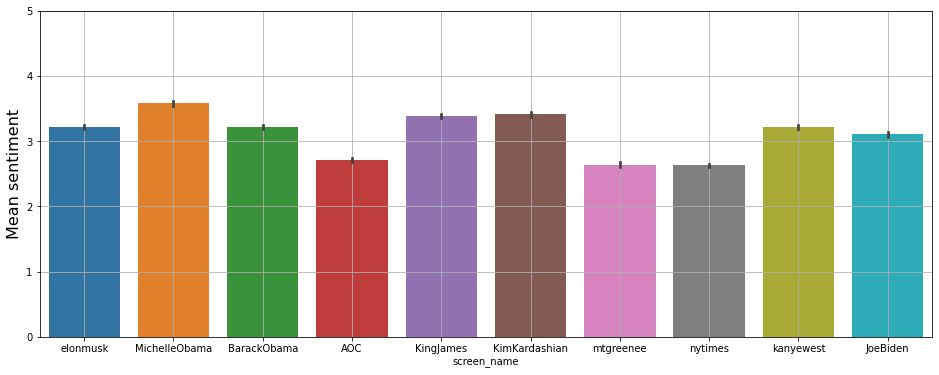

In [10]:
fig = plt.figure(figsize = (16,6))
sns.barplot(data = df, y= 'sentiment', x = 'screen_name' )
plt.ylim([2,4])
plt.ylabel("Mean sentiment",fontsize = 16)
plt.grid()
plt.ylim([0,5]);
plt.show()

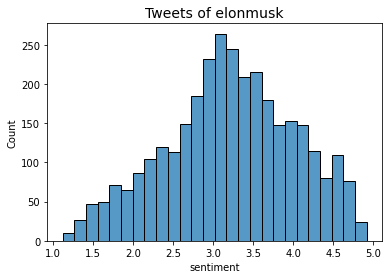

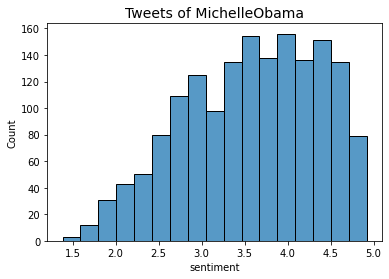

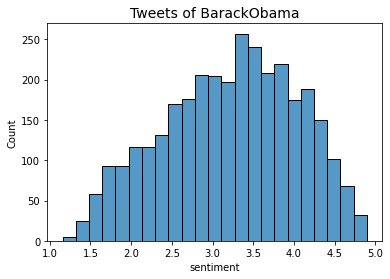

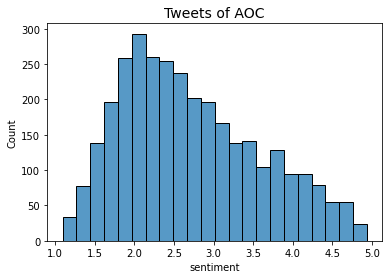

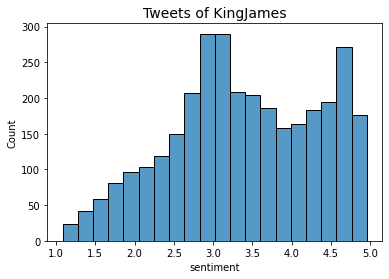

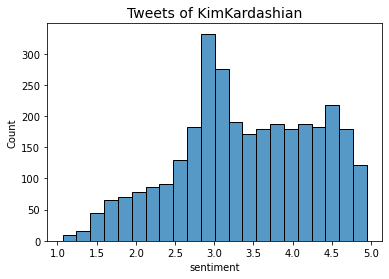

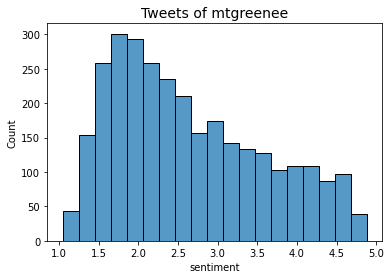

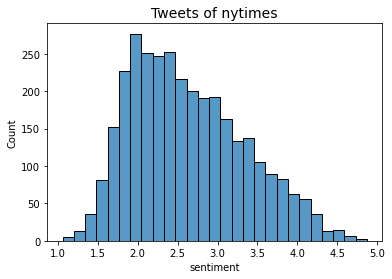

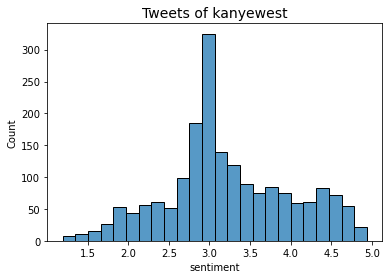

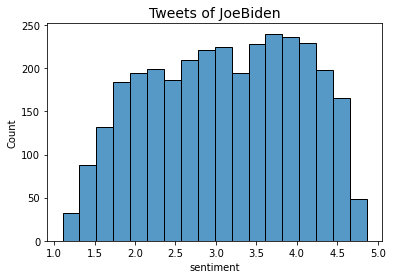

In [11]:
for screen_name in df.screen_name.unique():
  sns.histplot(data = df[df.screen_name==screen_name], x = 'sentiment')
  plt.title(f"Tweets of {screen_name}", fontsize = 14)
  plt.show()

In [12]:
ndisplay = 3
print(f"Top {ndisplay} most postive tweets per screen name")
for screen_name in df.screen_name.unique():
    df_display = df[(df.screen_name==screen_name)].sort_values(by = ['sentiment'], 
                                                               ascending = False)
    c=0
    print(f"\n{screen_name}")
    for index,row in df_display.iterrows():
        c+=1
        text = codecs.decode(row.text, 'unicode_escape')
        print(f"\tsentiment = {row.sentiment:.2f}: {text}")
        if c>=ndisplay:break

print("".join('-' * 200))

print(f"Top {ndisplay} Most Negative Tweets per Screen Name")
for screen_name in df.screen_name.unique():
    df_display = df[(df.screen_name==screen_name)].sort_values(by = ['sentiment'], ascending = True)
    c=0
    print(f"\n{screen_name}")
    for index,row in df_display.iterrows():
        c+=1
        text = codecs.decode(row.text, 'unicode_escape')
        print(f"\tsentiment = {row.sentiment:.2f}: {text}")
        if c>=ndisplay:break



Top 3 most postive tweets per screen name

elonmusk
	sentiment = 4.92: Such a privilege to work with people I like &amp; respect so much. I feel blessed. 
	sentiment = 4.91: One of the all-time best songs https://t.co/IvI7IOgMAa 
	sentiment = 4.91: @lrocket Thanks for everything you did to help build SpaceX! Some of the best memories ever. 

MichelleObama
	sentiment = 4.92: Happy 20th anniversary, Barack. Thank you for being an incredible partner, friend, and father every day. I love you! –mo 
	sentiment = 4.92: One of my greatest joys as First Lady was getting to meet so many incredible young people from across the country.… https://t.co/h3Q3vadmWE 
	sentiment = 4.92: So incredibly proud of these students! Everyone at @IPROMISESchool—teachers, staff, and of course those incredible… https://t.co/Hx0aQ4nTyJ 

BarackObama
	sentiment = 4.90: We remember everyone we lost on 9/11 and honor all who defend our country and our ideals. No act of terror will ever change who we are. 
	sentiment =

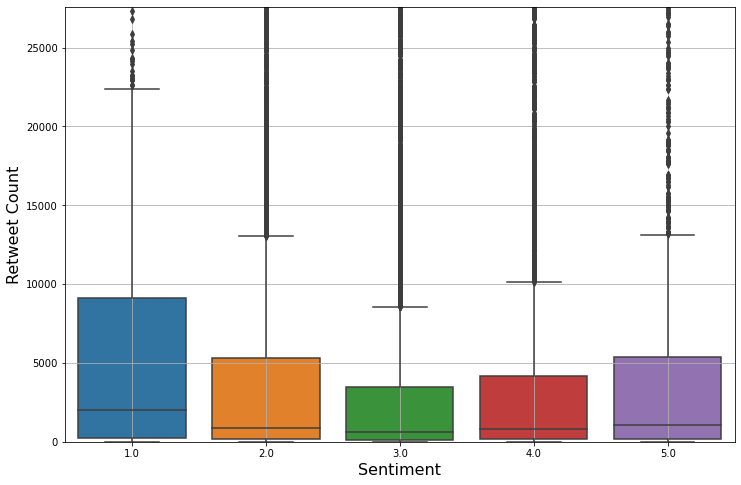

In [13]:
df['star'] = df.sentiment.round()

fig = plt.figure(figsize = (12,8))
sns.boxplot(data=df, x="star", y="retweet_count")
ymax = df.retweet_count.quantile(0.95)
plt.ylim([0,ymax])
plt.xlabel("Sentiment", fontsize = 16)
plt.ylabel("Retweet Count", fontsize = 16)
plt.grid()
plt.show()

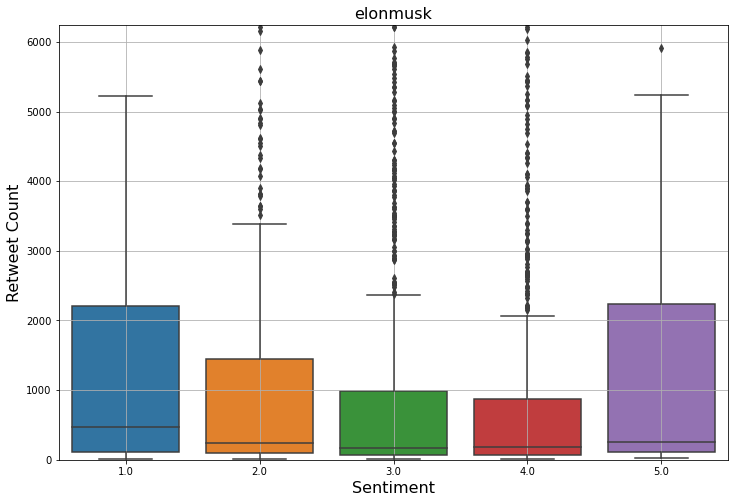

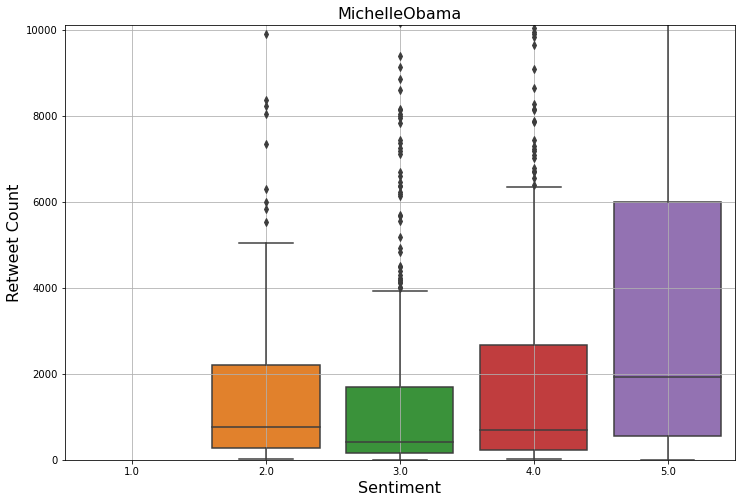

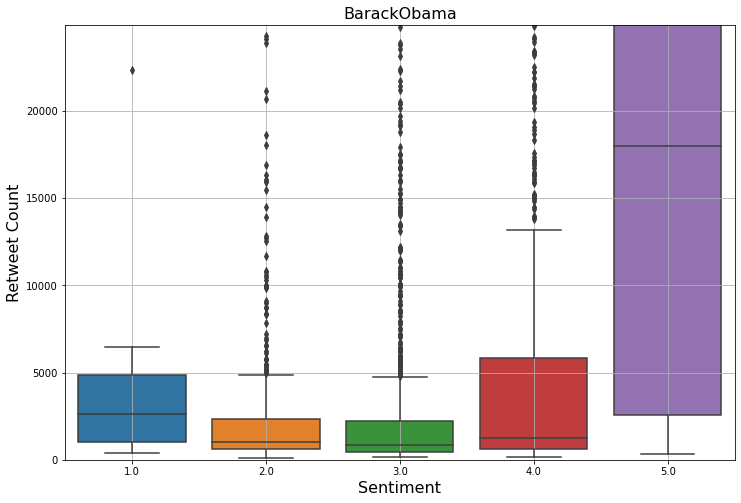

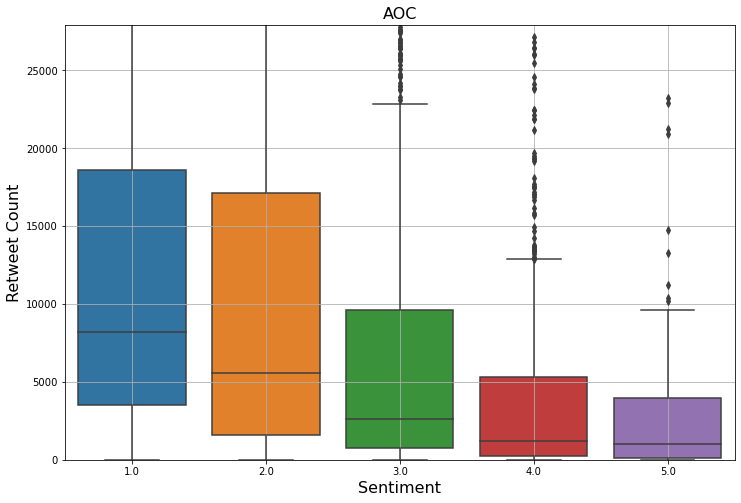

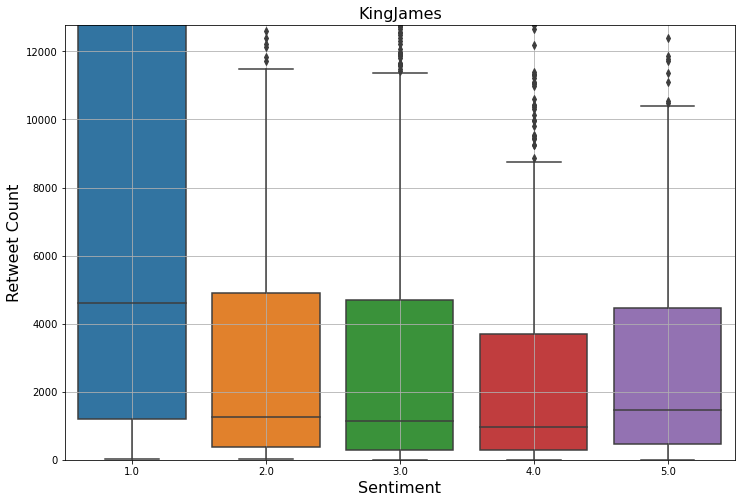

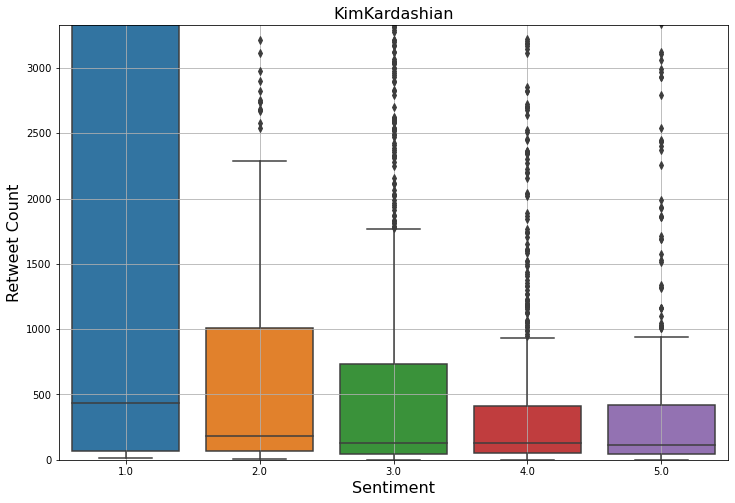

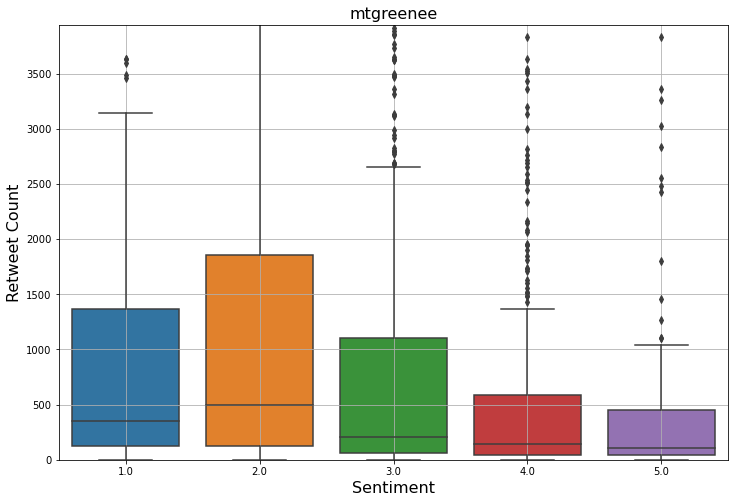

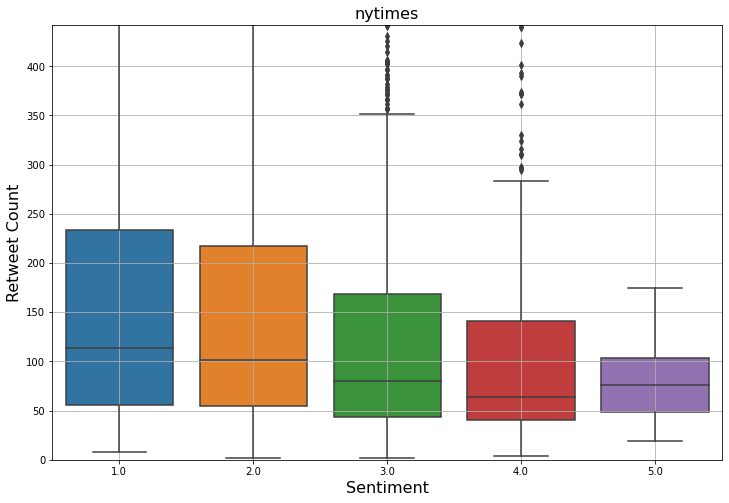

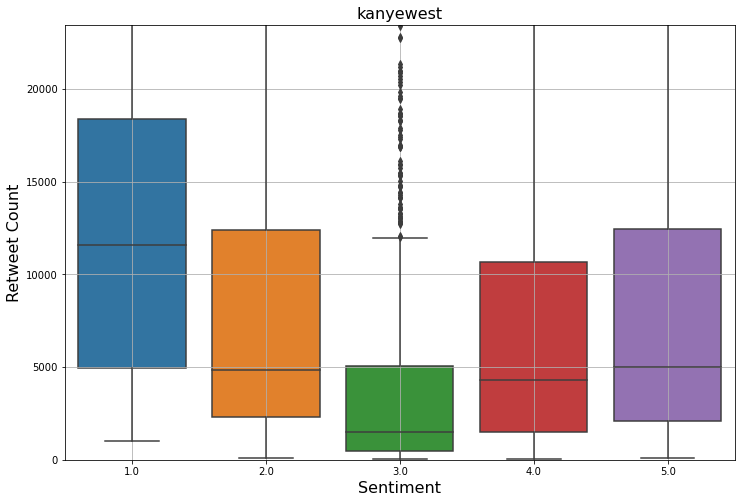

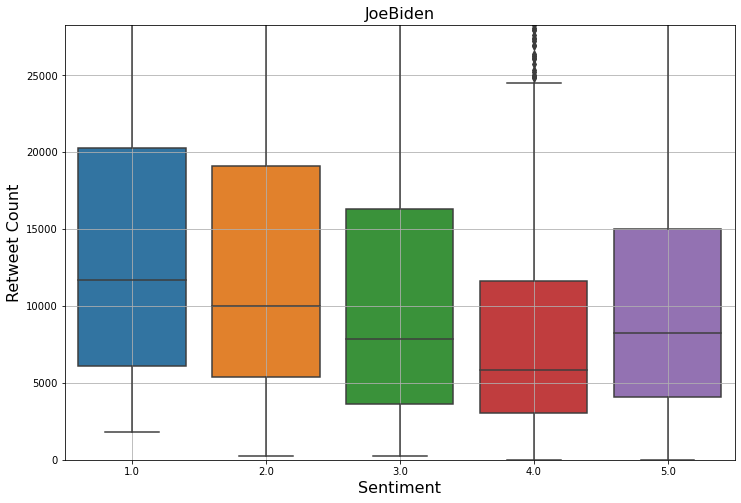

In [14]:
for screen_name in df.screen_name.unique():
    fig = plt.figure(figsize = (12,8))
    df_plot = df[df.screen_name==screen_name]
    ax = sns.boxplot(data=df_plot, x="star", y="retweet_count")
    ymax = df_plot.retweet_count.quantile(q=0.9)
    plt.ylim([0,ymax])
    plt.xlabel("Sentiment", fontsize = 16)
    plt.ylabel("Retweet Count", fontsize = 16)
    plt.title(f"{screen_name}", fontsize = 16)
    plt.grid()
    plt.show()

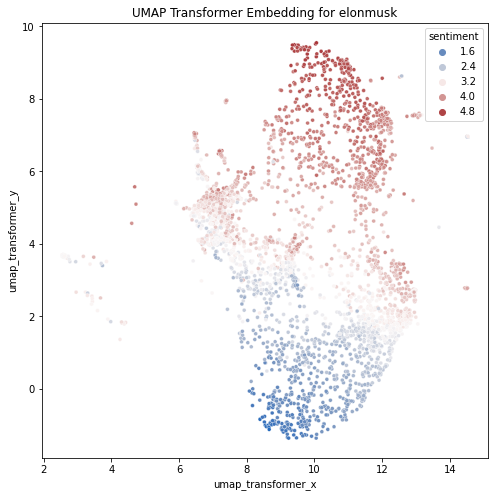

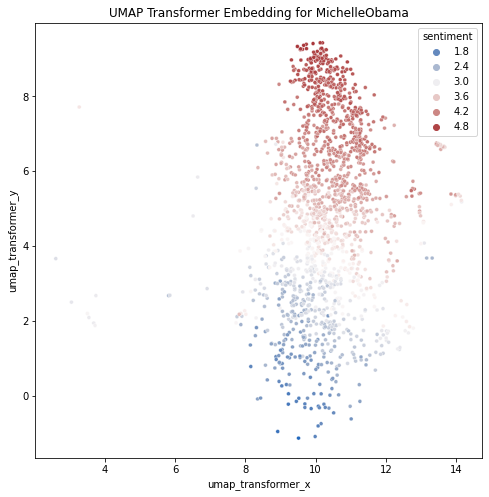

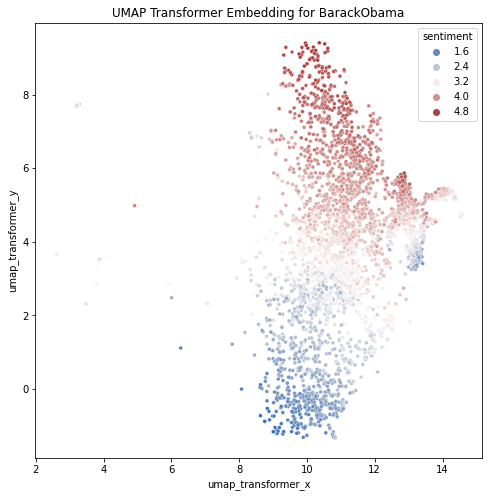

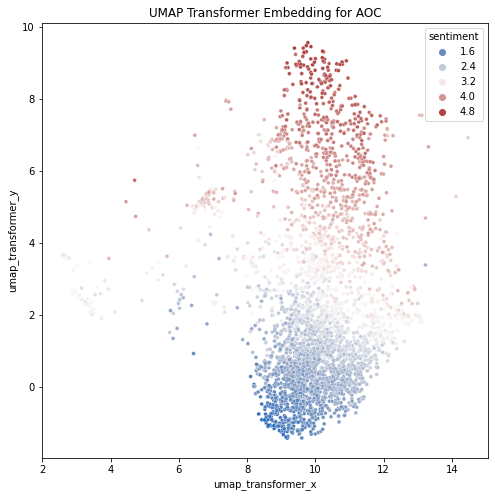

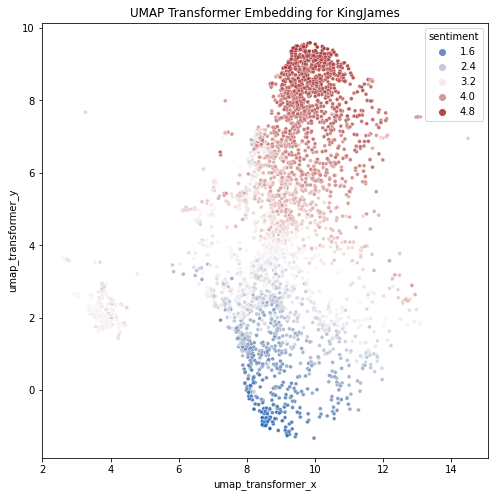

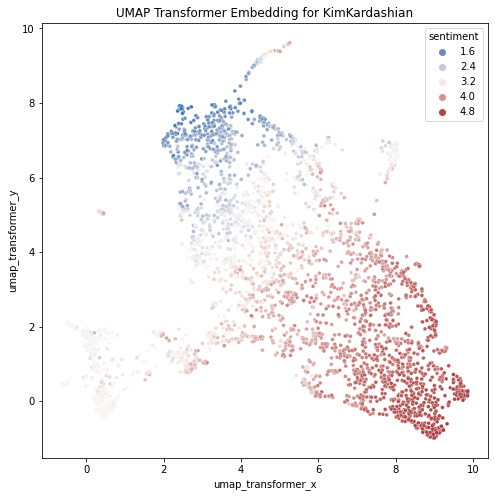

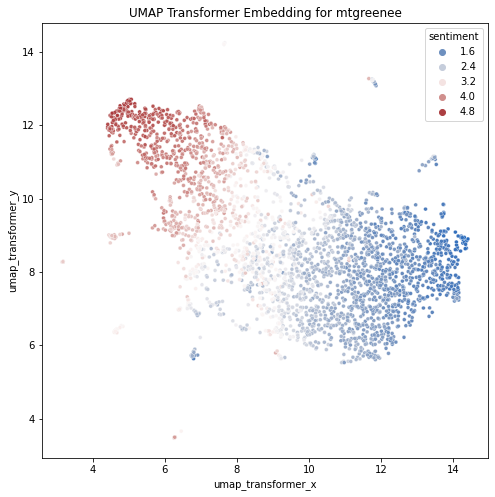

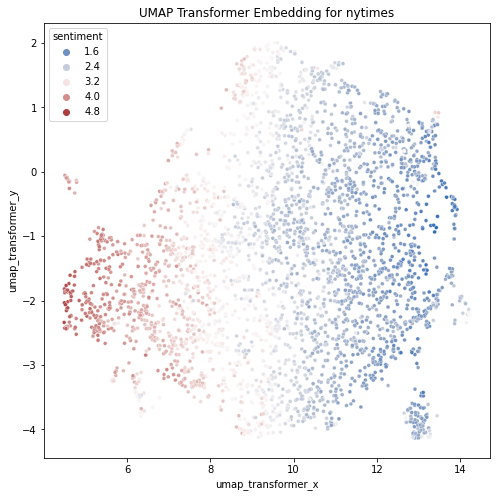

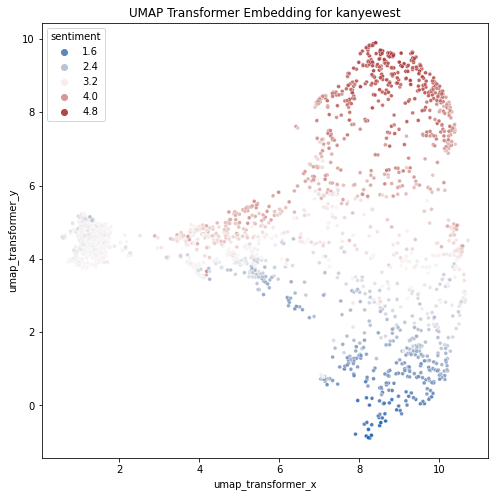

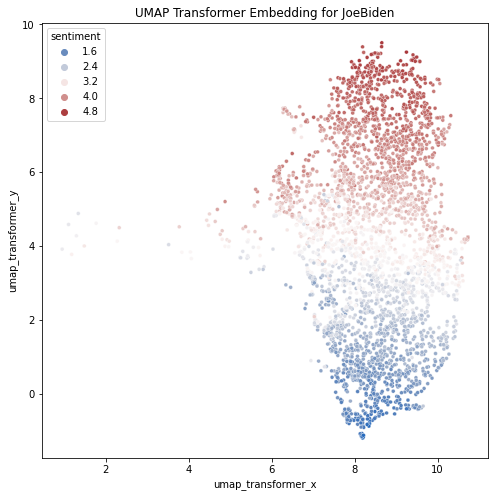

In [15]:
for screen_name in df.screen_name.unique():
  fig = plt.figure(figsize = (8,8))
  sns.scatterplot(data=df[df.screen_name == screen_name], 
                  x="umap_transformer_x", 
                  y="umap_transformer_y", 
                  hue="sentiment", 
                  palette="vlag", s=15)
  plt.title(f"UMAP Transformer Embedding for {screen_name}")
  plt.show()


## AI in fabrics of society:
### Turing Test
Can Machines Think like human?

Artificial Intellegence is developing by leaps and bounds, which enables robots to drive the car, transfer the language and predict the future (though not accurate). But can AI think like people? Sometimes when AIs are chatting like a people like what I experienced years ago when I was chatting with Bing (AI of Bing Research Engine):

![](./fig/sentiment/fig1.jpg)
![](./fig/sentiment/fig2.jpg)
![](./fig/sentiment/fig3.jpg)

You may saw some alluring movies with the topic that AI threats human and replace us, becoming the owner of the world. Indeed, such concerns are not surprising in today's era of rapid development of artificial intelligence, which has replaced many jobs, significantly improving efficiency, but there are also potential dangers such as job losses. Consequently, whether AI can replace human beings is a topic that scientists focus on.

This question confused us since AI occured. Alan Turing, a British mathematician and computer pioneer, gradually developed the basic concepts of computer science during his research on how to break German telegraph codes during World War II, and devoted himself to researching artificial intelligence after the war. In his 1950 paper Computing Machinery and Intelligence, he proposed the famous **Turing Test**, which checks whether a machine can display human intelligence by having it talk to a human, and if the human doesn't find out it's a machine, it's a success.

Specifically, the Turing Test is conducted in a room where human judges talk to a real person they cannot see and to a machine, and determine which is a human and which is a machine based on the quality of the conversation. Now the Turing test conversation is usually 5 minutes long, if more than 30% of the judges treat the computer as a human, then the computer is successful. Turing had predicted that a machine would pass the Turing test in 2000 AD. As a result, an AI really passed, only 10 years later.

Wiki: https://en.m.wikipedia.org/wiki/Turing_test

Some competitions including **Loebner Prize** are held to find the most "human" computer/human. AI now becomes more similar to human beings, the competition aims at finding the most human-like one and the development level of AI.

Wiki: https://en.wikipedia.org/wiki/Loebner_Prize